In [1]:
import seaborn as sns
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt


In [2]:
logging.basicConfig(
    level = logging.INFO,
    format = '%(levelname)s - %(lineno)d:\n%(message)s',
    datefmt='%H:%M:%S'
)
logger = logging.getLogger(__name__)
logger.info('Logger setup successfully')

INFO - 7:
Logger setup successfully


# Exploratory Data Analysis

In [3]:
bike_share = pd.read_csv('day.csv')
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
bike_share.describe()

,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,729.000000,718.000000,731.000000
mean,0.495385,0.474354,0.629359,0.186392,4504.348837
std,0.183051,0.162961,0.139758,0.071791,1937.211452
min,0.059130,0.079070,0.254167,0.022392,22.000000
25%,0.337083,0.337842,0.522083,0.134331,3152.000000
50%,0.498333,0.486733,0.627500,0.178802,4548.000000
75%,0.655417,0.608602,0.730417,0.230724,5956.000000
max,0.861667,0.840896,0.972500,0.378108,8714.000000


In [4]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
bike_share['dteday'] = pd.to_datetime(bike_share['dteday'])
bike_share.drop(['instant','casual','registered'],axis=1,inplace=True,errors='ignore')
# convert all categorical columns to objects
cat_cols = ['season','yr','mnth','weekday','weathersit','workingday','holiday']

for col in cat_cols:
    bike_share[col] = bike_share[col].astype('object')
    
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   yr          731 non-null    object        
 3   mnth        731 non-null    object        
 4   holiday     731 non-null    object        
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    object        
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 74.4+ KB


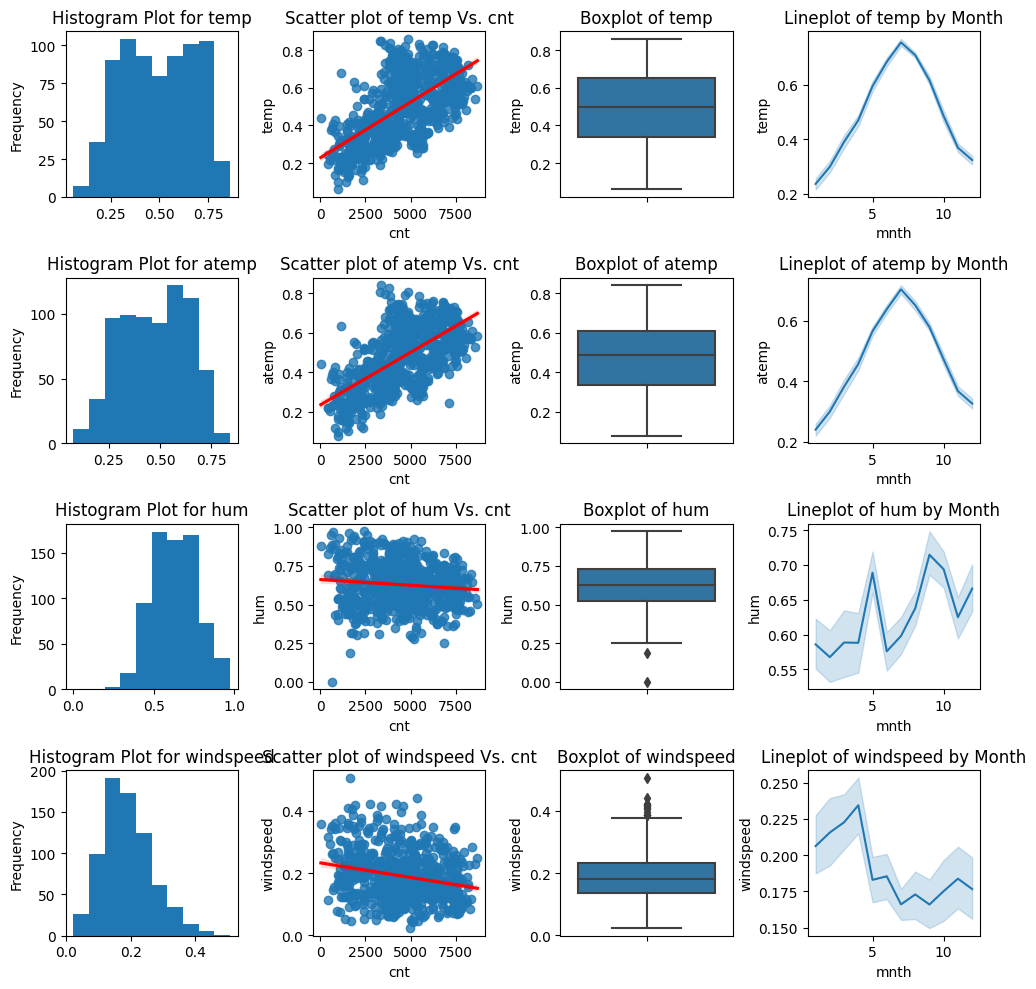

In [6]:
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt

def diagnostic_plots(df, target):
    """
    Plot diagnostic plots for each column in a supplied dataframe.
    Boxplot
    Histogram
    Scatterplot
    """
    num_df = df.select_dtypes(include='number')
    fig, axs = plt.subplots(nrows=len(num_df.columns)-1, ncols=4,figsize=(10,10))
    row=0
    
    for col in num_df:
        if col == target:
            continue
            
        num_df[col].plot(kind='hist',ax=axs[row,0])
        axs[row,0].set_title(f'Histogram Plot for {col}')
        
        
#         sns.scatterplot(y=num_df[col],x=num_df[target],ax=axs[row,1])
#         axs[row,1].set_title(f'Scatter plot of {col} Vs. {target}')
        
        sns.regplot(y=num_df[col], x=num_df[target], ax=axs[row, 1],line_kws={'color':'red'})
        axs[row,1].set_title(f'Scatter plot of {col} Vs. {target}')
        
        sns.boxplot(y=num_df[col],ax=axs[row,2])
        axs[row,2].set_title(f'Boxplot of {col}')
        
        
        sns.lineplot(y=num_df[col],x=df['mnth'],ax=axs[row,3])
        axs[row,3].set_title(f'Lineplot of {col} by Month')
        row +=1
        plt.tight_layout()
        
    
num_df = bike_share.select_dtypes(include=['number','object'])
diagnostic_plots(num_df, target='cnt')


Text(0.5, 1.0, 'Correlation Plot of Numerical Variables')

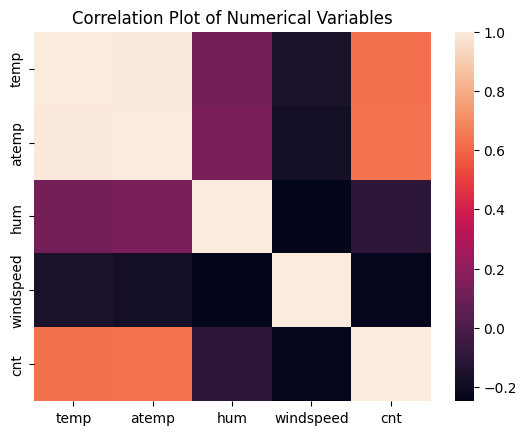

In [7]:
#num_df = bike_share.select_dtypes(include='number')
cor = bike_share.corr()
sns.heatmap(cor)
plt.title('Correlation Plot of Numerical Variables')

# Data Cleaning & Transformation

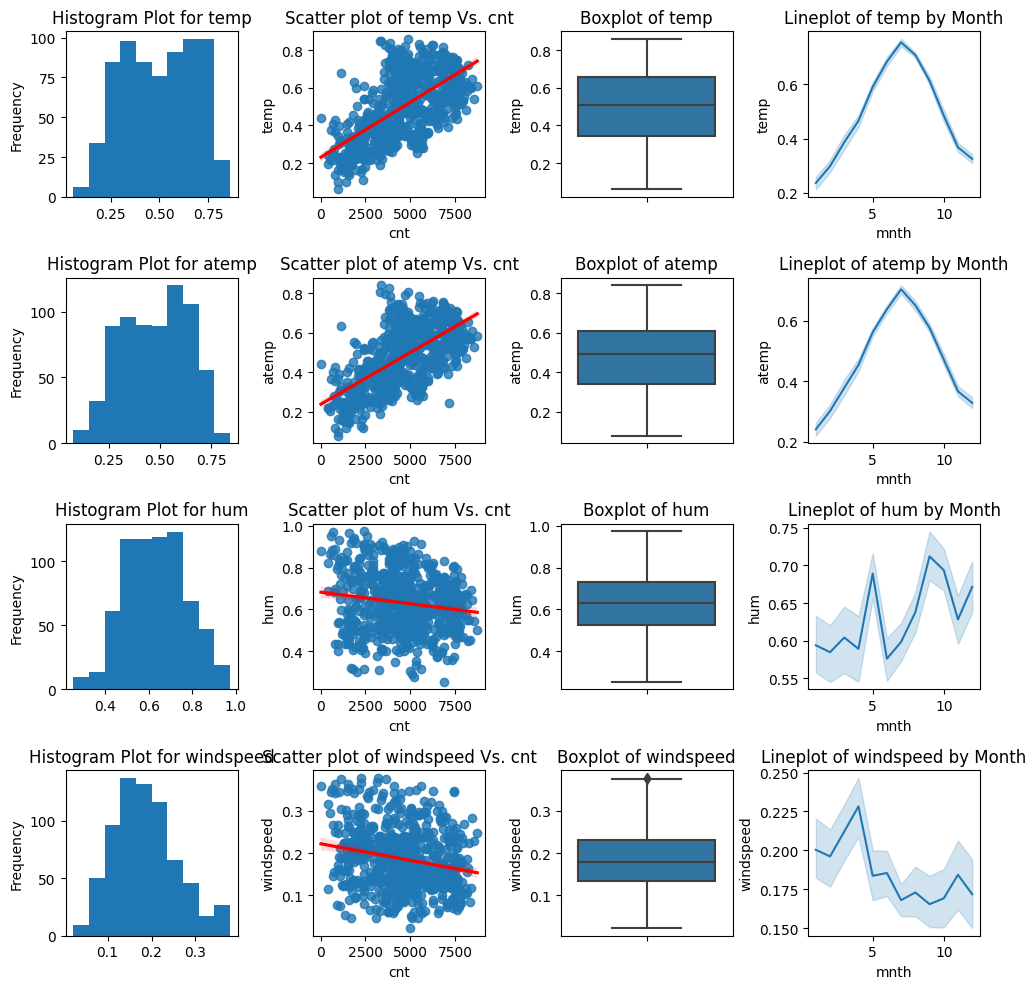

In [8]:
def remove_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    col[~((col>=lower_bound)&(col<=upper_bound))] = np.nan
    return col
    
    

res = bike_share.apply(remove_outliers)

res.dropna(how='any',inplace=True)
res.head()
diagnostic_plots(res, target='cnt')

In [11]:
# Transform categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = bike_share.select_dtypes(include='object').columns
num_df = bike_share.select_dtypes(include='number')
num_df_na = num_df.apply(remove_outliers)
logger.info(cat_cols)


cat_df = bike_share[cat_cols].apply(lambda col: le.fit_transform(col))
combined_df = pd.concat([cat_df,num_df_na],axis=1)
combined_df = combined_df.dropna(how='any')


INFO - 9:
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')


In [12]:
combined_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

# Linear Regression Model

In [13]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


X = combined_df.drop('cnt',axis=1)
y = combined_df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

logger.info(f'{len(combined_df)} total values observed in dataset.\n{len(X_train)} values used for model training.\n{len(X_test)} values used for model testing.')

INFO - 9:
714 total values observed in dataset.
571 values used for model training.
143 values used for model testing.


In [14]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
logger.info(est2.summary())

INFO - 4:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     196.7
Date:                Sun, 02 Jun 2024   Prob (F-statistic):          4.90e-184
Time:                        11:59:43   Log-Likelihood:                -4665.1
No. Observations:                 571   AIC:                             9354.
Df Residuals:                     559   BIC:                             9406.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1342.7329    303.596      4.42

In [ ]:
from sklearn.linear_model import ElasticNetCV

en = 